In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.datasets import load_iris

In [2]:
%matplotlib inline

SIZE_SMALL = 18
SIZE_MEDIUM = 20
SIZE_LARGE = 24

plt.rc("font", size=SIZE_SMALL)           # text size
plt.rc("axes", titlesize=SIZE_SMALL)      # fontsize of axes title
plt.rc("axes", labelsize=SIZE_SMALL)      # fontsize of x and y labels
plt.rc("xtick", labelsize=SIZE_SMALL)     # fontsize of x tick labels
plt.rc("ytick", labelsize=SIZE_SMALL)          # fontsize of y tick labels
plt.rc("legend", fontsize=SIZE_SMALL)         # fontsize of legend
plt.rc("figure", titlesize=SIZE_LARGE)         # fontsize of figure title

In [3]:
iris_data = load_iris()

X = iris_data.data
y = iris_data.target
print(iris_data.feature_names)
print(iris_data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(data=X, columns=iris_data.feature_names)
df['label'] = pd.Series(iris_data.target_names[y], dtype='category')

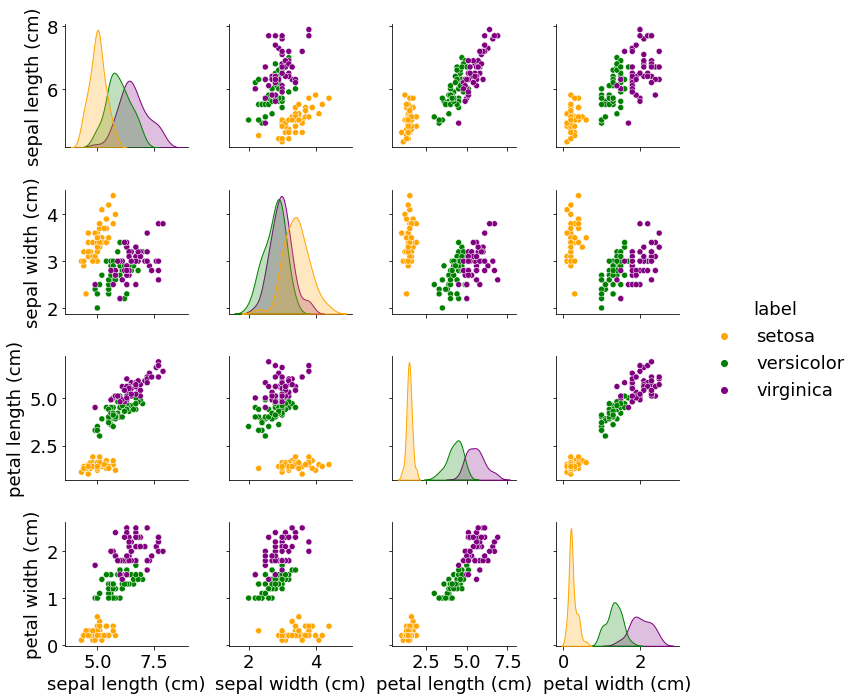

In [5]:
palette = { 'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple' }

g = sns.pairplot(df, vars=df.columns[0:4], hue='label', palette=palette)
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier

ndx = [2,3]   # petal length and width
X = iris_data.data[:, ndx]

x_names = [iris_data.feature_names[i] for i in ndx]
y_names = iris_data.target_names

print(x_names)
print(y_names)

['petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [11]:
def plot_surface(classifier, X, y, x_names, y_names):
  num_classes = 3
  plot_step = 0.02
  markers = ["o", "s", "^"]

  plt.figure(figsize=(10, 10))
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

  z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)
  plt.xlabel(x_names[0])
  plt.ylabel(y_names[1])

  cmap = ListedColormap(["orange", "green", "purple"])
  # cmap = ListedColormap(sns.color_palette())

  plot_colors = [cmap(i) for i in range(4)]
  cs = plt.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

  for i, color, marker in zip(range(num_classes), plot_colors, markers):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], label=y_names[i], edgecolor="black", color=color, s=50, cmap=cmap, marker=marker)
  
  plt.legend()

# Tree with depth 2


In [8]:
tree_classifier = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_classifier.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

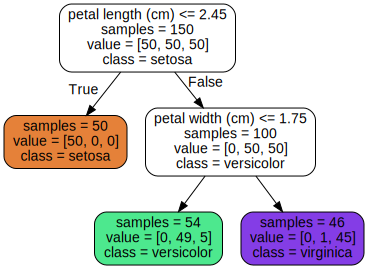

In [9]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_classifier,
    out_file="iris_tree.dot",
    feature_names=x_names,
    class_names=y_names,
    rounded=True,
    impurity=False,
    filled=True
)

Source.from_file("iris_tree.dot")

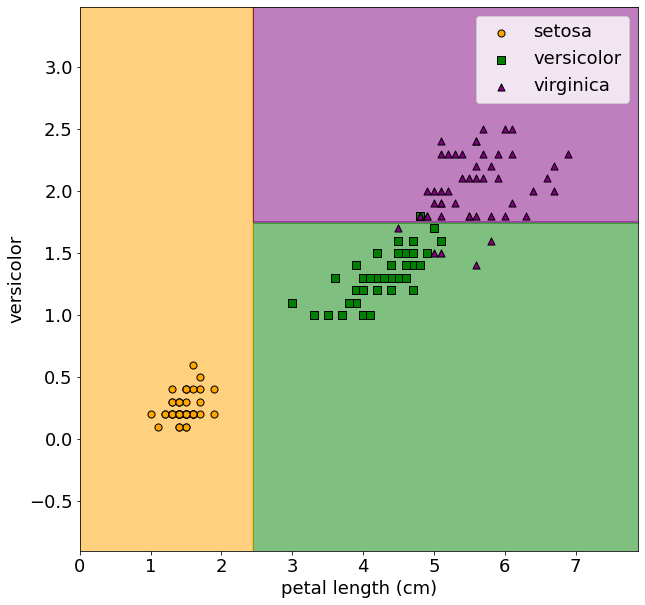

In [12]:
plot_surface(tree_classifier, X, y, x_names, y_names)

# Tree with depth 3

In [13]:
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

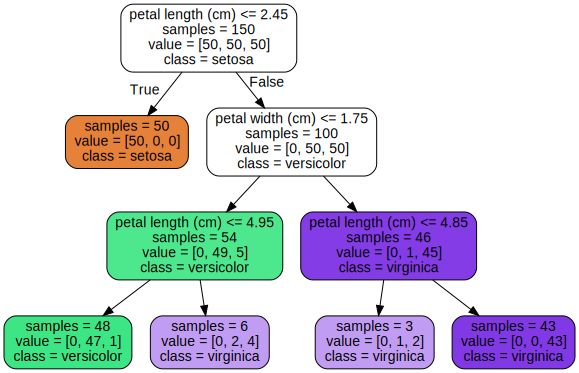

In [14]:
export_graphviz(
    tree_classifier,
    out_file="iris_tree.dot",
    feature_names=x_names,
    class_names=y_names,
    rounded=True,
    impurity=False,
    filled=True
)

Source.from_file("iris_tree.dot")

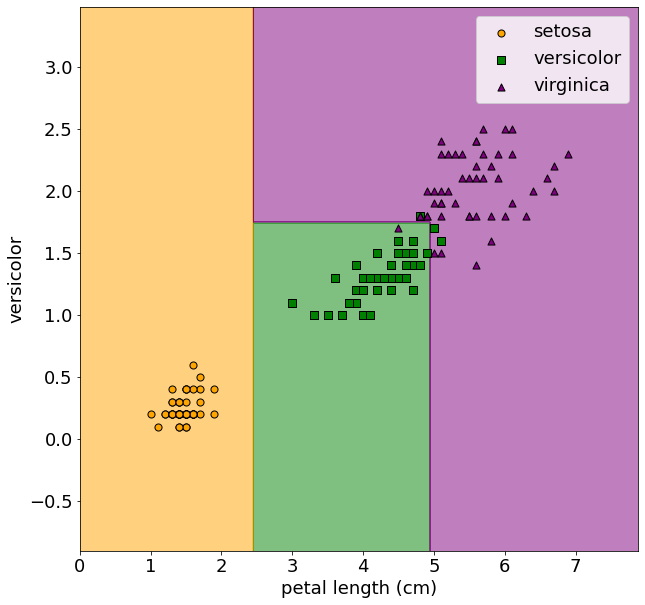

In [15]:
plot_surface(tree_classifier, X, y, x_names, y_names)

# Tree depth unrestricted

In [16]:
tree_classifier = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_classifier.fit(X, y)

DecisionTreeClassifier(random_state=42)

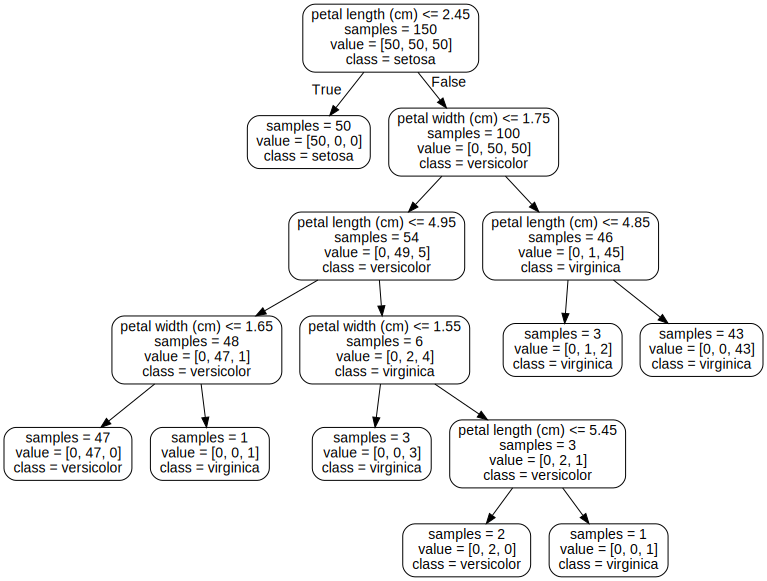

In [17]:
export_graphviz(
    tree_classifier,
    out_file="iris_tree.dot",
    feature_names=x_names,
    class_names=y_names,
    rounded=True,
    filled=False,
    impurity=False
)

Source.from_file("iris_tree.dot")

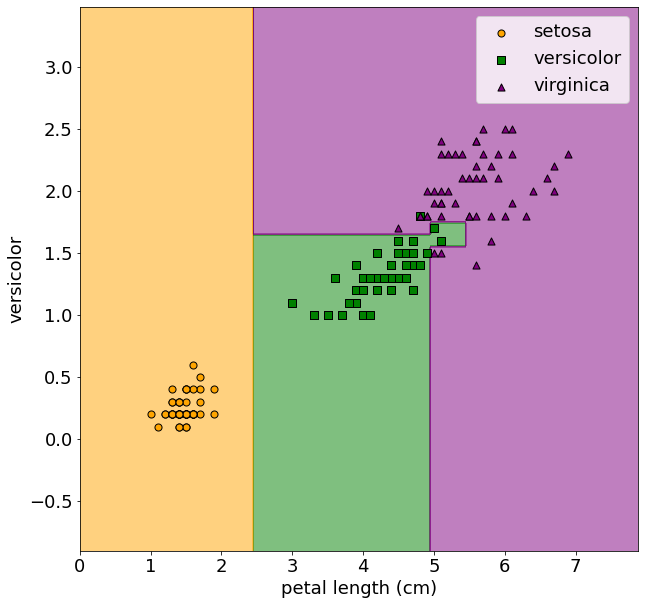

In [19]:
plot_surface(tree_classifier, X, y, x_names, y_names)